# Analyzing Liquor Sale Trends in Iowa


# Table of Contents

### 1. Executive Summary
### 2. Problem Statement
### 3. Dataset Summary
### 4. Data Cleaning and Transformation
### 5. Exploratory Data Analysis
### 6. Machine Learning Modelling
### 7. Conclusion
### 8. Future Scope




# 1. Executive Summary 

The 'Iowa Liquor Retail Sales' dataset, sourced by the Iowa Department of Commerce and extracted from BigQuery, provides detailed insights on the state's liquor sales. In this notebook, we explore the dataset with the aim of providing insights that are useful for both consumers and retailers. Our goal is to help retailers address key supply chain concerns such as incorrect forecasting and recognition of demand constraints.

We have conducted an exploratory data analysis (EDA) of the dataset, which is divided into four topics:

* ***Topic 1: Trends in liquor sales from 2012 to the present***
* ***Topic 2: Analysis of liquor sales by count and profit***
* ***Topic 3: Forecasting liquor demand based on historical data***
* ***Topic 4: Understanding vendor and retail store data***

Through our EDA, we hope to decipher patterns and relationships that will aid in the effective management of liquor sales in Iowa. Our visualizations and explorations are designed to be insightful and informative, providing a foundation for future analysis and decision-making.

Additionally, we have undergone machine learning to predict the volume sold in the incoming months, for which we have run a Linear Regression based model. The benefit of this is for retailers to be able to have a realistic idea of what to expect, optimise their supply chain decisions and ensure that resources are allocated efficiently.



## 2.1 Problem Definition

Our goal is to analyze the liquor sale trends in Iowa by deploying an in-depth analysis on the liquor sales trends and patterns, assisting retail stores anser questions such as "which liquor", "when to buy" and "how much", demand forecasting, and stockout prediction to assist the retailers and other relevant stakeholders make informed and data-driven decisions. Further, our analysis and results will assist the stakeholders optimize their customer forefront workforce, supply chain and pricing metrics.


## 2.2 Interest & Motivation

Our motivation is to understand the retail industry and gain a closer lens on the key performance indicators in it. We intend to assist retailers, distributors, and manufacturers make optimal and data-driven decisions and in turn, maximize their profits, business processes and be able to provide maximum customer satisfaction.







## 3. Dataset Summary

Source: Iowa Alcoholic Beverages Division, Iowa Department of Commerce. Iowa Liquor Retail Sales (https://console.cloud.google.com/marketplace/product/iowa-department-of-commerce/iowa-liquor-sales?project=nice-storm-375722&pli=1)



### 3.1 Dataset Overview

**A brief description on the dataset**<br>
This dataset contains the spirits purchase information of Iowa Class “E” liquor licensees by product and date of purchase from January 1, 2012 to current. The dataset can be used to analyze total spirits sales in Iowa of individual products at the store level. Class E liquor license, for grocery stores, liquor stores, convenience stores, etc., allows commercial establishments to sell liquor for off-premises consumption in original unopened containers.

The dataset contains 25,939,367 rows and 24 columns. Each record provides information of the sale and purchase of a particular liquor on a particular day in Iowa. 

In [13]:
data = "gs://ba843-aa/notebooks/jupyter/data/"

In [14]:
spark.conf.set("spark.sql.execution.arrow.enabled", "false")

23/05/01 19:40:54 WARN SQLConf: The SQL config 'spark.sql.execution.arrow.enabled' has been deprecated in Spark v3.0 and may be removed in the future. Use 'spark.sql.execution.arrow.pyspark.enabled' instead of it.


### Loading the data into a Spark DataFrame


Create iowa dataframe by using the given schema:

In [15]:
iowa = spark.read.format("bigquery")\
  .option("header", "true")\
  .option("nullValue", "NA")\
  .option('table', 'arjun-ba843:liquor.iowa') \
  .load()

Below is the schema and glimpse of the dataset.  

In [20]:
iowa.printSchema()
iowa.show(1, False)

root
 |-- invoice_and_item_number: string (nullable = true)
 |-- date: date (nullable = true)
 |-- store_number: string (nullable = true)
 |-- store_name: string (nullable = true)
 |-- address: string (nullable = true)
 |-- city: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- store_location: string (nullable = true)
 |-- county_number: string (nullable = true)
 |-- county: string (nullable = true)
 |-- category: string (nullable = true)
 |-- category_name: string (nullable = true)
 |-- vendor_number: string (nullable = true)
 |-- vendor_name: string (nullable = true)
 |-- item_number: string (nullable = true)
 |-- item_description: string (nullable = true)
 |-- pack: long (nullable = true)
 |-- bottle_volume_ml: long (nullable = true)
 |-- state_bottle_cost: double (nullable = true)
 |-- state_bottle_retail: double (nullable = true)
 |-- bottles_sold: long (nullable = true)
 |-- sale_dollars: double (nullable = true)
 |-- volume_sold_liters: double (nullable = tr

23/05/01 15:26:37 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-----------------------+----------+------------+---------------------------+--------------+---------+--------+---------------------------+-------------+------+---------+-----------------+-------------+--------------------------------+-----------+----------------+----+----------------+-----------------+-------------------+------------+------------+------------------+-------------------+----+-----+
|invoice_and_item_number|date      |store_number|store_name                 |address       |city     |zip_code|store_location             |county_number|county|category |category_name    |vendor_number|vendor_name                     |item_number|item_description|pack|bottle_volume_ml|state_bottle_cost|state_bottle_retail|bottles_sold|sale_dollars|volume_sold_liters|volume_sold_gallons|year|month|
+-----------------------+----------+------------+---------------------------+--------------+---------+--------+---------------------------+-------------+------+---------+-----------------+----------

### Shape of Dataframe


In [5]:
num_rows = iowa.count()
num_cols = len(iowa.columns)

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 25939367
Number of columns: 26


### Number of Unique Values in Each Column


In [6]:
from pyspark.sql.functions import countDistinct

# count the number of unique values in each column
unique_counts = [iowa.agg(countDistinct(col)).collect()[0][0] for col in iowa.columns]

# print the results
for i, col in enumerate(iowa.columns):
    print(f"{col}: {unique_counts[i]}")


invoice_and_item_number: 25939367
date: 2857
store_number: 2887
store_name: 3067
address: 2893
city: 478
zip_code: 1009
store_location: 4928
county_number: 99
county: 104
category: 114
category_name: 113
vendor_number: 760
vendor_name: 571
item_number: 12177
item_description: 11202
pack: 28
bottle_volume_ml: 58
state_bottle_cost: 3466
state_bottle_retail: 3937
bottles_sold: 713
sale_dollars: 32597
volume_sold_liters: 1626
volume_sold_gallons: 1924
year: 12
month: 12


### 3.2 Column Exploration

column names           | description        | dtype | comment |
-----------------------|---------------------|-------|---------|
 Invoice/Item Number | Unique Transaction ID of sale | string | **object**
 Date | day, month and year of transaction | date | **date**
 Year | Year of transaction | int | **numeric**
 Month | Month of transaction | int | **numeric**
 Store Number | Unique Number of Each Store | int | **numeric**
 Store Name | Name of Each Liquor Store | string | **object**
 Address | Address of Each Store | string | **object**
 City | City of the Store | string | **object**
 Zip Code | Zip code of Store | string | **object**
 Store Location | Latitude and Longitude of Store | string | **object**
 County Number | Unique Number of County | int | **numeric**
 County | County Name | string | **object**
 Category | Category of Liquor | int | **numeric**
 Category Name | Name of Liquor Category | string | **object**
 Vendor Number | Unique Number of Each Vendor/Wholesaler | int | **numeric**
 Vendor Name | Name of Vendor/Wholesaler | string | **object**
 Item Number | Number of Liquor Item | int | **numeric**
 Item Description | Name of Liquor | string | **object**
 Pack | Pack Size | int | **numeric** Size of Pack bought by retailer
 Bottle Volume (ml) | Volume of Liquor Bottle in ml | int | **numeric**
 State Bottle Cost | Cost of Liquor | float | **numeric** Cost of Liquor Bottle to Retailer
 State Bottle Retail| Selling Price of Liquor | float | **numeric**
 Bottles Sold | Number of Bottles | int | **numeric** Bottles sold of each liquor per transaction
 Sale (Dollars) | Revenue | float | **numeric** Revenue generated by Retailer per transaction
 Volume Sold (Liters) | Volumne Sold in Liters | float | **numeric**
 Volume Sold (Gallons) | Volumne Sold in Gallons | float | **numeric**



### Caching the DataFrame

In [16]:
#Caching the dataframe
iowa.cache()

23/05/01 19:41:07 WARN SQLConf: The SQL config 'spark.sql.execution.arrow.enabled' has been deprecated in Spark v3.0 and may be removed in the future. Use 'spark.sql.execution.arrow.pyspark.enabled' instead of it.


DataFrame[invoice_and_item_number: string, date: date, store_number: string, store_name: string, address: string, city: string, zip_code: string, store_location: string, county_number: string, county: string, category: string, category_name: string, vendor_number: string, vendor_name: string, item_number: string, item_description: string, pack: bigint, bottle_volume_ml: bigint, state_bottle_cost: double, state_bottle_retail: double, bottles_sold: bigint, sale_dollars: double, volume_sold_liters: double, volume_sold_gallons: double, year: bigint, month: bigint]

## 4. Data Cleaning and Transformation

## 4.1 Data Quality Check

### 4.1.1 Removing Irrelevant Columns

Through data overview and granular analysis, we saw that certain columns ('County Number', 'Category', 'Vendor Number', 'Item Number' and 'Volume Sold (Gallons)') have redundant and/or irrelevant values and won't add useful insights or value to the analysis. As a result, we are dropping these columns for better analysis and results. For instance, 'County Number' just provides the number of each county. As 'County' is already given, we can drop the respective column. 

In [17]:
iowa = iowa.drop('county_number', 'category', 'vendor_number', 'item_number', 'volume_sold_gallons')

### 4.1.2 Analyzing Null Values

In [9]:
from pyspark.sql.functions import col

for col_name in iowa.columns:
    print(f"Number of null values in {col_name}: {iowa.filter(col(col_name).isNull()).count()}")

Number of null values in invoice_and_item_number: 0
Number of null values in date: 0
Number of null values in store_name: 0


Number of null values in address: 81931
Number of null values in city: 81930
Number of null values in zip_code: 81997
Number of null values in store_location: 2489494
Number of null values in county: 158733
Number of null values in category_name: 25040
Number of null values in vendor_name: 7
Number of null values in item_description: 0
Number of null values in pack: 0
Number of null values in bottle_volume_ml: 0
Number of null values in state_bottle_cost: 10
Number of null values in state_bottle_retail: 10
Number of null values in bottles_sold: 0
Number of null values in sale_dollars: 10
Number of null values in volume_sold_liters: 0
Number of null values in year: 0
Number of null values in month: 0


Most of the columns have ***insignificant number*** of null or missing values (within 5-7%) ; only the column 'store_location' has significant number of null values so we will be dropping that colummn. We are not dropping the 'store_location' column as we want to vizually analyze the store distribution map in Iowa. However, as there approx. 10% null or missing values, we won't be using in our exploratory phase. 



### 4.1.3 Analyzing Unknown Values & Duplicates, if any?

In [11]:
from pyspark.sql.functions import col, lower

# check if columns have unknown values
for col_name in iowa.columns:
    print(f"Number of unknown values in {col_name}: {iowa.filter(lower(col(col_name)) == 'unknown').count()}")

Number of unknown values in invoice_and_item_number: 0


Number of unknown values in date: 0


Number of unknown values in store_name: 0


Number of unknown values in address: 0


Number of unknown values in city: 0
Number of unknown values in zip_code: 0
Number of unknown values in county: 0


Number of unknown values in category_name: 0


Number of unknown values in vendor_name: 0


Number of unknown values in item_description: 0


Number of unknown values in pack: 0


Number of unknown values in bottle_volume_ml: 0


Number of unknown values in state_bottle_cost: 0


Number of unknown values in state_bottle_retail: 0
Number of unknown values in bottles_sold: 0


Number of unknown values in sale_dollars: 0


Number of unknown values in volume_sold_liters: 0
Number of unknown values in year: 0
Number of unknown values in month: 0


In [12]:
iowa = iowa.drop_duplicates()
iowa.count()

25939367

Since this is a clean and well-maintained dataset there are no duplicates! The number matches the one before dropping duplicates.


## 4.2 Pre-processing

Having a closer lens on the data, certain columns need to be amended or modified to make the records concise and easier to analyze. For instance, 'bottle_volume_ml' variable is in "ml" whereas 'volume_sold_liters' is in "liters". As such, for the sake of standardization and better interpretability, we will convert the 'bottle_volume_ml' variable into liters and rename it to 'bottle_volume_liters'. 

## 4.2.1 Amending Columns

### 4.2.1.1 Bottle Volume (ml)

As mentioned above, we will convert this column into liters and rename it accordingly.

In [18]:
from pyspark.sql.functions import col

iowa = iowa.withColumn("bottle_volume_liters", col("bottle_volume_ml") / 1000)
iowa = iowa.drop('bottle_volume_ml')

### 4.2.1.2 Sale (Dollars)

We will convert the column name from 'sale_dollars' to 'Revenue' as it's more intuitive and easier to comprehend. 


In [19]:
iowa = iowa.withColumnRenamed("sale_dollars", "Revenue")

### 4.2.1.3 Date

Analyze the date range (minimum & maximum) in the dataset

In [15]:
from pyspark.sql.functions import to_timestamp, date_format
from pyspark.sql import SparkSession

iowa.selectExpr("min(date)", "max(date)").show()


+----------+----------+
| min(date)| max(date)|
+----------+----------+
|2012-01-03|2023-02-28|
+----------+----------+



We have cleaned and transformed the data and the resulting dataset is shown below.


In [16]:
iowa.limit(3).toPandas()

,invoice_and_item_number,date,store_name,address,city,zip_code,county,category_name,vendor_name,item_description,pack,state_bottle_cost,state_bottle_retail,bottles_sold,Revenue,volume_sold_liters,year,month,bottle_volume_liters
0,INV-02969300006,2017-01-30,BENZ DISTRIBUTING,501 7TH AVE SE,CEDAR RAPIDS,52401,LINN,WHISKEY LIQUEUR,SAZERAC COMPANY INC,FIREBALL CINNAMON WHISKEY,12,11.34,17.01,60,1020.60,60.0,2017,1,1.00
1,INV-50298300094,2022-08-12,SUPER QUICK 2 / HUBBELL,1824 HUBBELL AVE,DES MOINES,50317.0,POLK,NEUTRAL GRAIN SPIRITS FLAVORED,OLE SMOKY DISTILLERY LLC,OLE SMOKY WHITE CHOCOLATE STRAWBERRY MOONSHINE...,8,8.75,13.13,4,52.52,0.2,2022,8,0.05
2,INV-28166800094,2020-06-22,LOT-A-SPIRITS,3780 STATE ST,BETTENDORF,52722.0,SCOTT,TENNESSEE WHISKIES,BROWN FORMAN CORP.,JACK DANIELS OLD #7 BLACK LABEL,12,18.89,28.34,60,1700.40,60.0,2020,6,1.00


In [17]:
num_rows = iowa.count()
num_cols = len(iowa.columns)

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 25939367
Number of columns: 19


Now we will move onto the next phase of our analysis: ***Exploratory Data Analysis***.


## 5. Exploratory Data Analysis

Through the preliminary analysis lens, let's generate the statistical summary of the numerical columns in the dataset, which include the count, mean, standard deviation, minimum, maximum, and quartiles of each column to understand the numeric columns better.


In [18]:
iowa.describe().toPandas()

,summary,invoice_and_item_number,store_name,address,city,zip_code,county,category_name,vendor_name,item_description,pack,state_bottle_cost,state_bottle_retail,bottles_sold,Revenue,volume_sold_liters,year,month,bottle_volume_liters
0,count,25939367,25939367,25857436,25857437,25857370,25780634,25914327,25939360,25939367,25939367,25939357,25939357,25939367,25939357,25939367,25939367,25939367,25939367
1,mean,4.357724276733182E10,None,None,None,51260.22718775617,None,None,None,None,12.186507905146645,10.368806438425167,15.56468444187606,10.684580583635677,142.01845858669662,9.165616619327045,2017.3500753892722,6.61885218710233,0.8880251448309352
2,stddev,1.0685979111505371E11,None,None,None,989.9383413223156,None,None,None,None,7.71930114942717,11.794572843488329,17.691076721167146,29.74833455782199,495.49231354425984,35.54591254513338,3.2129081835363538,3.46932700802227,0.6349578610417347
3,min,306831300001,"""DOUBLE """"D"""" LIQUOR STORE""",1 GROVE ROAD,ACKLEY,50002,ADAIR,100 PROOF VODKA,10TH MOUNTAIN WHISKEY & SPIRIT COMPANY,"""BEEFEATER """"24""""""",1,0.0,0.0,-360,-9720.0,-630.0,2012,1,0.0
4,max,S444400083,ZAPF'S PRONTO MARKET,PO BOX 261 310 W DILLON,ZWINGLE,80904,WRIGHT,WHITE RUM,"YAHARA BAY DISTILLERS, INC",ZYR VODKA,336,18436.0,27654.0,15000,279557.28,15000.0,2023,12,378.0


Through the above table, we can get an eyeball on the summary statistics of the numerical data in the dataset. 

### Correlation Analysis

Analyzing the correlation between bottles sold and profit to ensure the sanctity of the data. Logically, there should be a ***high positive correlation*** between the two metrics. 

In [11]:
from pyspark.sql.functions import corr

# select the relevant columns from the dataframe
bottles_profit = iowa.select('bottles_sold', ((iowa['state_bottle_retail'] - iowa['state_bottle_cost']) * iowa['bottles_sold']).alias('profit'))

# calculate the correlation
correlation = bottles_profit.corr("bottles_sold", "profit")

print(f"Correlation between bottles sold and profit: {correlation}")

Correlation between bottles sold and profit: 0.8303989045584956


The result is a correlation value of 0.83, which suggests a strong positive correlation between the number of bottles sold and total profit generated.

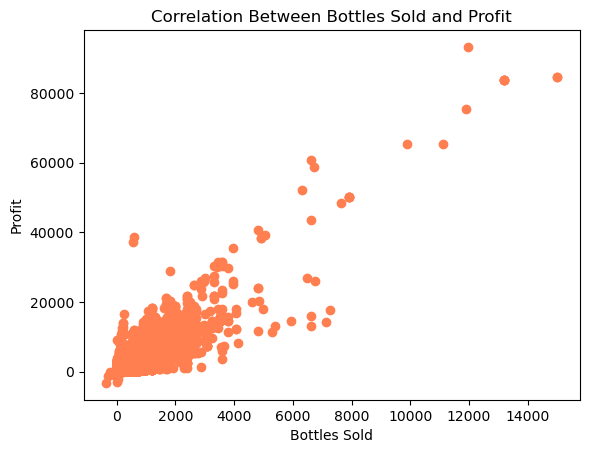

In [17]:
import matplotlib.pyplot as plt

# Extract the relevant data from the dataframe and calculate profit
data = iowa.select('bottles_sold', ((iowa['state_bottle_retail'] - iowa['state_bottle_cost']) * iowa['bottles_sold']).alias('profit')).toPandas()

# Create a scatter plot of bottles_sold vs profit
plt.scatter(data['bottles_sold'], data['profit'], color = 'coral')
plt.xlabel('Bottles Sold')
plt.ylabel('Profit')
plt.title('Correlation Between Bottles Sold and Profit')
plt.show()

The plot shows that there is a ***high positive correlation*** between bottles sold and profit, as the total number of bottles sold increases, the total profit also increases. This relationship is expected, as the more bottles sold, the higher the revenue, and thus the higher the profit generated.

### Analyzing the Store Locations in Iowa

In [22]:
from pyspark.sql import functions as F
from pyspark.sql import types as T
import folium
import geopandas as gpd
import re
import io
import requests
import zipfile

# Download the state and county shapefile zips
county_shapefile_url = "https://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_us_county_5m.zip"
response = requests.get(county_shapefile_url)
with zipfile.ZipFile(io.BytesIO(response.content)) as zip_file:
    zip_file.extractall("shapefile_data")

# Read the state and county boundary shapefiles
county_shapefile = gpd.read_file("shapefile_data/cb_2020_us_county_5m.shp")
iowa_counties = county_shapefile[county_shapefile['STATEFP'] == '19']

# Extract latitude and longitude from store_location
def extract_lat_lng(store_location):
    if store_location:
        lat, lng = re.findall(r"[-+]?\d*\.\d+|\d+", store_location)
        return float(lat), float(lng)
    return None, None

iowa = iowa.withColumn("lat_lng", F.udf(extract_lat_lng, T.StructType([T.StructField("latitude", T.DoubleType()), T.StructField("longitude", T.DoubleType())]))("store_location"))

# Filter the dataset to a smaller subset (e.g., top 50 stores by sales) to make the map more readable
top_stores = iowa.groupBy("store_number", "store_name", "lat_lng") \
    .agg(F.sum("revenue").alias("total_sales")) \
    .orderBy(F.col("total_sales").desc()) \
    .limit(50)

top_stores_pd = top_stores.toPandas()

# Create a map centered on Iowa
iowa_map = folium.Map(location=[42.0, -93.4], zoom_start=7)

# Plot Iowa state boundary and county boundaries
folium.GeoJson(iowa_counties.geometry).add_to(iowa_map)

# Add store locations to the map as markers
for index, row in top_stores_pd.iterrows():
    lat, lng = row['lat_lng']
    if lat and lng:
        folium.Marker(
            location=[lat, lng],
            popup=f"{row['store_name']}<br>Total Sales: ${row['total_sales']:.2f}",
            icon=folium.Icon(color="blue")
        ).add_to(iowa_map)

# Show the map
iowa_map


https://github.com/anmolsrivastava05/Bis-Data-For-Business/blob/main/WhatsApp%20Image%202023-05-01%20at%203.55.53%20PM.png


*Click on the above link to access the Iowa map the team has built.* 

To further understand the dataset, we have presented a map of iowa above with sales highlighted to give us a visual representation of where the ***retail stores*** exist in iowa.

### **Topic 1: Liquor Sale Trend from 2012 to Current**

#### [Question 1.1]: Perform a year-to-year analysis to understand the liqour sale pattern and trend in Iowa?

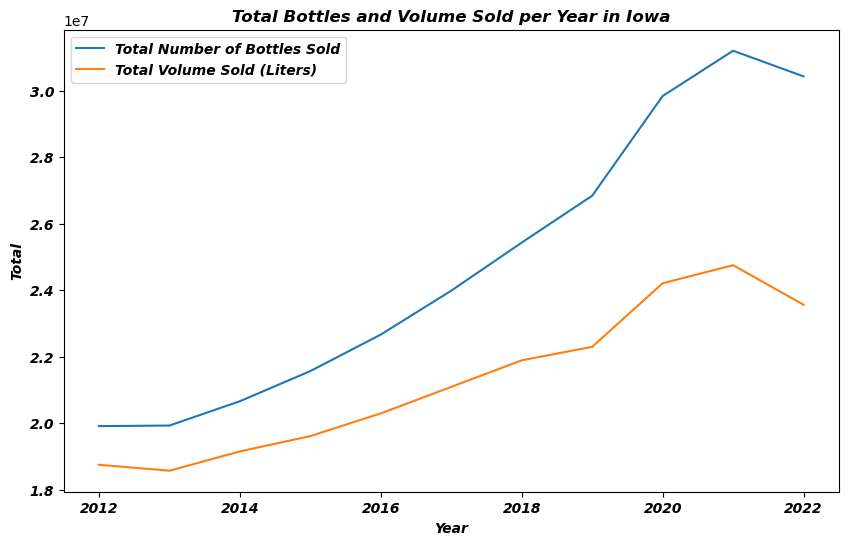

In [19]:
from pyspark.sql.functions import year
import matplotlib.pyplot as plt

iowa_filtered = iowa.filter((iowa.year >= 2012) & (iowa.year <= 2022))

# calculate the total number of bottles sold and volume sold for each year
total_bottles_sold_df = iowa_filtered.groupBy("year").sum("bottles_sold").orderBy("year")
total_volume_sold_df = iowa_filtered.groupBy("year").sum("volume_sold_liters").orderBy("year")

# convert the DataFrames to Pandas
total_bottles_sold_df = total_bottles_sold_df.toPandas()
total_volume_sold_df = total_volume_sold_df.toPandas()

# plot the line graph
plt.figure(figsize=(10,6))
plt.plot(total_bottles_sold_df["year"], total_bottles_sold_df["sum(bottles_sold)"], label="Total Number of Bottles Sold")
plt.plot(total_volume_sold_df["year"], total_volume_sold_df["sum(volume_sold_liters)"], label="Total Volume Sold (Liters)")
plt.title("Total Bottles and Volume Sold per Year in Iowa", fontweight='bold', fontstyle='italic')
plt.xlabel("Year", fontweight='bold', fontstyle='italic')
plt.ylabel("Total", fontweight='bold', fontstyle='italic')
plt.xticks(fontweight='bold', fontstyle='italic')
plt.yticks(fontweight='bold', fontstyle='italic')
plt.legend(prop={"weight": "bold", "style":"italic"})
plt.show()


As only 2-month data is available is for the year 2023, we are taking into consideration only data from 2012 - 2022 for the sake of standardization and comparison. 

Through a year-to-year analysis, we can see that the liquor sale in terms of both count and volume sold has generally been ***increasing exponentially*** in Iowa as we move from 2012 to 2021. However, the liquor sale dropped in the year 2022. One potential reason can be the effect of covid-19; residents of Iowa purchased more alcohol during the work-home culture during the pandemic. 

#### [Question 1.2]: Perform a year-to-year analysis to understand the total revenue and profit generated by liquor retailers per year in Iowa on average from 2012 to 2022?

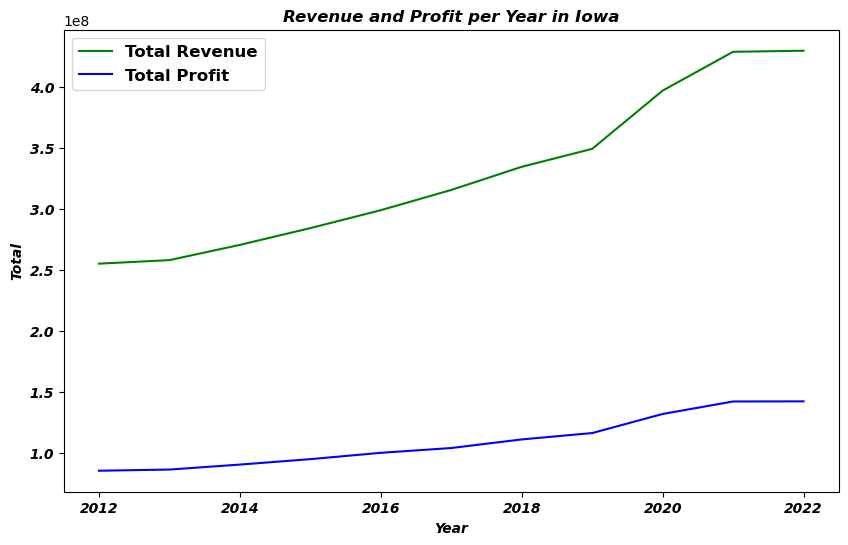

In [9]:
from pyspark.sql.functions import month, year, round
import matplotlib.pyplot as plt

# filter the dataset to include only years 2012-2022
iowa_filtered = iowa.filter((iowa.year >= 2012) & (iowa.year <= 2022))

# calculate total revenue, cost, and profit for each month
monthly_totals_df = iowa_filtered.withColumn("total_cost", round(iowa_filtered.bottles_sold * iowa_filtered.state_bottle_cost, 2)) \
                                 .withColumn("total_revenue", round(iowa_filtered.bottles_sold * iowa_filtered.state_bottle_retail, 2)) \
                                 .withColumn("total_profit", round(iowa_filtered.Revenue - iowa_filtered.bottles_sold * iowa_filtered.state_bottle_cost, 2)) \
                                 .groupBy("year").sum("bottles_sold", "total_cost", "total_revenue", "total_profit").orderBy("year")

# convert the DataFrame to Pandas
monthly_totals_df = monthly_totals_df.toPandas()

# plot the line graph
plt.figure(figsize=(10,6))
plt.plot(monthly_totals_df["year"], monthly_totals_df["sum(total_revenue)"], label="Total Revenue", color='green')
plt.plot(monthly_totals_df["year"], monthly_totals_df["sum(total_profit)"], label="Total Profit", color='blue')
plt.title("Revenue and Profit per Year in Iowa", fontweight='bold', fontstyle='italic')
plt.xlabel("Year", fontweight='bold', fontstyle='italic')
plt.ylabel("Total", fontweight='bold', fontstyle='italic')
plt.xticks(fontweight='bold', fontstyle='italic')
plt.yticks(fontweight='bold', fontstyle='italic')
plt.legend(prop={'weight':'bold', 'size':'large'})
plt.show()


Analyzing the revenue and total profit generated per year, on average, in Iowa, we can see that both total revenue and profit generated per year on average has generally been ***increasing exponentially*** in Iowa as we move from 2012 to 2021. However, the liquor sale dropped in the year 2022. One potential reason can be the effect of covid-19; residents of Iowa purchased more alcohol during the work-home culture during the pandemic.  

#### [Question 1.3]: Perform a month-to-month analysis to understand the liqour sale pattern?

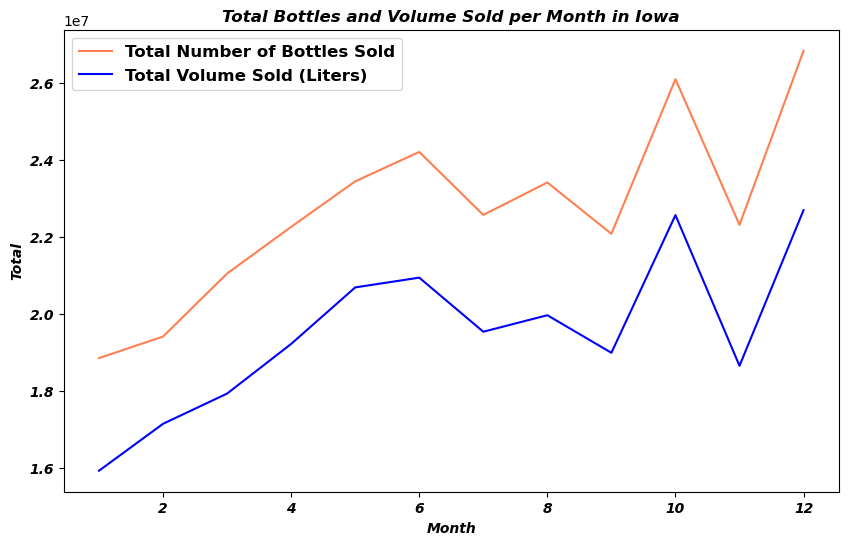

In [21]:
from pyspark.sql.functions import month, year
import matplotlib.pyplot as plt

iowa_filtered = iowa.filter((iowa.year >= 2012) & (iowa.year <= 2022))

# calculate the total number of bottles sold and volume sold for each month
total_bottles_sold_df = iowa_filtered.groupBy("month").sum("bottles_sold").orderBy("month")
total_volume_sold_df = iowa_filtered.groupBy("month").sum("volume_sold_liters").orderBy("month")

# convert the DataFrames to Pandas
total_bottles_sold_df = total_bottles_sold_df.toPandas()
total_volume_sold_df = total_volume_sold_df.toPandas()

# plot the line graph
plt.figure(figsize=(10,6))
plt.plot(total_bottles_sold_df["month"], total_bottles_sold_df["sum(bottles_sold)"], label="Total Number of Bottles Sold", color='coral')
plt.plot(total_volume_sold_df["month"], total_volume_sold_df["sum(volume_sold_liters)"], label="Total Volume Sold (Liters)", color='blue')
plt.title("Total Bottles and Volume Sold per Month in Iowa", fontweight='bold', fontstyle='italic')
plt.xlabel("Month", fontweight='bold', fontstyle='italic')
plt.ylabel("Total", fontweight='bold', fontstyle='italic')
plt.xticks(fontweight='bold', fontstyle='italic')
plt.yticks(fontweight='bold', fontstyle='italic')
plt.legend(prop={'weight':'bold', 'size':'large'})
plt.show()


Through a month-to-month analysis, we can see that the liquor sale in terms of count and volume sold is *highest* in the month of **December**, followed by ***October***, across all years (2012-2022). One potential reason can be that December is the holiday season, and October includes Halloween and other fall celebrations. During these times, people tend to socialize more and attend parties, which can increase the demand for alcohol.



#### [Question 1.4]: Perform a month-to-month analysis to understand the total revenue and profit generated by liquor retailers per month in Iowa on average from 2012 to 2022?

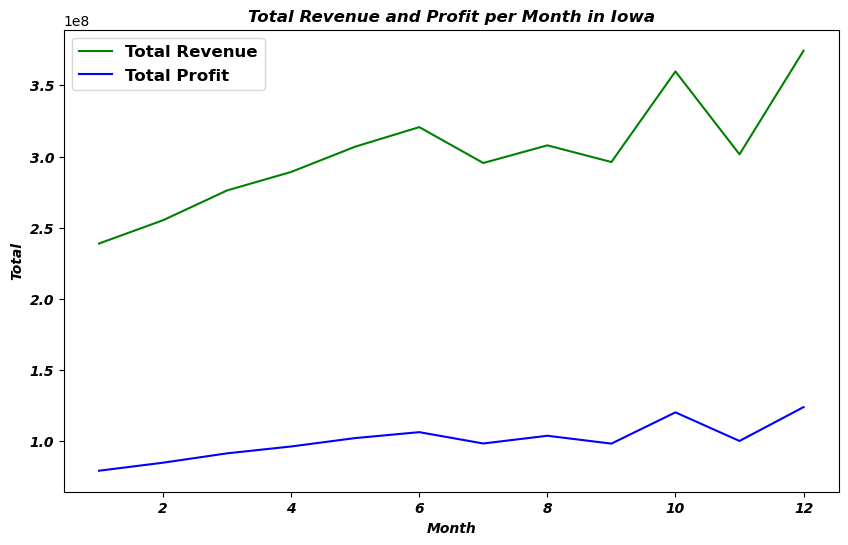

In [10]:
from pyspark.sql.functions import month, year, round
import matplotlib.pyplot as plt

# filter the dataset to include only years 2012-2022
iowa_filtered = iowa.filter((iowa.year >= 2012) & (iowa.year <= 2022))

# calculate total revenue, cost, and profit for each month
monthly_totals_df = iowa_filtered.withColumn("total_cost", round(iowa_filtered.bottles_sold * iowa_filtered.state_bottle_cost, 2)) \
                                 .withColumn("total_revenue", round(iowa_filtered.bottles_sold * iowa_filtered.state_bottle_retail, 2)) \
                                 .withColumn("total_profit", round(iowa_filtered.Revenue - iowa_filtered.bottles_sold * iowa_filtered.state_bottle_cost, 2)) \
                                 .groupBy("month").sum("bottles_sold", "total_cost", "total_revenue", "total_profit").orderBy("month")

# convert the DataFrame to Pandas
monthly_totals_df = monthly_totals_df.toPandas()

# plot the line graph
plt.figure(figsize=(10,6))
plt.plot(monthly_totals_df["month"], monthly_totals_df["sum(total_revenue)"], label="Total Revenue", color='green')
plt.plot(monthly_totals_df["month"], monthly_totals_df["sum(total_profit)"], label="Total Profit", color='blue')
plt.title("Total Revenue and Profit per Month in Iowa", fontweight='bold', fontstyle='italic')
plt.xlabel("Month", fontweight='bold', fontstyle='italic')
plt.ylabel("Total", fontweight='bold', fontstyle='italic')
plt.xticks(fontweight='bold', fontstyle='italic')
plt.yticks(fontweight='bold', fontstyle='italic')
plt.legend(prop={'weight':'bold', 'size':'large'})
plt.show()

Analyzing the revenue and total profit generated per month, on average, in Iowa, we can see that both total revenue and profit generated per month on average is highest in the months of ***December***, followed by ***October***. One potential reason can be that December is the holiday season, and October includes Halloween and other fall celebrations. During these times, people tend to socialize more and attend parties, which can increase the demand for alcohol. 

#### [Question 1.5]: Are there any Outliers in liquor sales trends in the last 5 years?

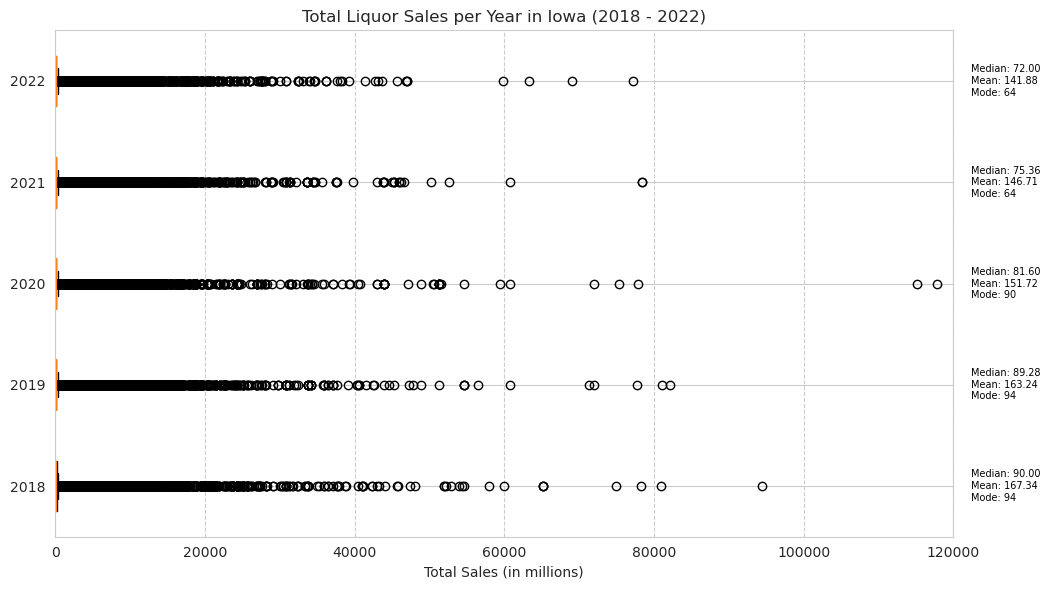

In [46]:
from pyspark.sql.functions import year
import matplotlib.pyplot as plt
import numpy as np

# Filter data from 2012 to current
iowa_filtered = iowa.filter((iowa.year >= 2012) & (iowa.year <= 2022))

# Get the last five years
last_five_years = [2022, 2021, 2020, 2019, 2018]

# Create a list to store the sales data for each year
sales_data = []

# Loop through the last five years and get the sales data for each year
for year in last_five_years:
    sales_data.append(iowa_filtered.filter(iowa_filtered.year == year).select("Revenue").rdd.flatMap(lambda x: x).collect())

# Plot box plots for the last five years
fig, ax = plt.subplots(figsize=(10,6))
plt.boxplot(sales_data, vert=False, widths=0.5, patch_artist=True, boxprops=dict(facecolor='coral'), whiskerprops=dict(color='black', linestyle='-', linewidth=1.2))
plt.title("Total Liquor Sales per Year in Iowa (2018 - 2022)")
plt.xlabel("Total Sales (in millions)")
plt.yticks(range(1,6), last_five_years[::-1])
ax.set_xlim([0, 120000]) # Set x-axis limit
plt.grid(axis='x', linestyle='--')
plt.tight_layout()

# Compute median, lower quartile and upper quartile from the data for each year
for i, year in enumerate(last_five_years):
    sales_data_i = [x for x in sales_data[i] if x >= 0]  # Filter out negative elements
    median = np.median(sales_data_i)
    q1 = np.quantile(sales_data_i, 0.25)
    q3 = np.quantile(sales_data_i, 0.75)
    mean = np.mean(sales_data_i)
    mode = np.argmax(np.bincount(np.array(sales_data_i).astype(int)))
    
    # Add text to the plot on the right side
    plt.text(x=1.02*ax.get_xlim()[1], y=i+1, s=f"Median: {median:.2f}\nMean: {mean:.2f}\nMode: {mode}", fontdict=dict(color='black', size=7), va='center')
    
    
# Show the plot
plt.show()

To achieve an ***understanding of the general patterns for iowa liqour sales in the last 5 years (2018-2022)***, the above visualization helps understand and analyze how each retailer performed and what the outliers were.

### **Topic 2: Liquor Sale Analysis with respect to Count & Profit**

#### [Question 2.1]: Which are the top liquors that had the highest sales in Iowa?

In [28]:
from pyspark.sql.functions import sum

# calculate the total number of bottles sold across all item_description
total_bottles_sold = iowa.agg({"bottles_sold": "sum"}).collect()[0][0]

# calculate the top 10 items sold by volume
liquor_count = iowa.groupBy("item_description").sum("bottles_sold") \
                  .orderBy("sum(bottles_sold)", ascending=False).limit(10)

# add a new column with the percentage distribution of bottles sold for each item_description
liquor_count = liquor_count.withColumn("Percentage Distribution", round(liquor_count["sum(bottles_sold)"] / total_bottles_sold * 100, 2))

# sort the DataFrame by sum(bottles_sold) column in descending order
liquor_count = liquor_count.sort("sum(bottles_sold)", ascending=False)

liquor_count.toPandas()


,item_description,sum(bottles_sold),Percentage Distribution
0,FIREBALL CINNAMON WHISKEY,12871034,4.64
1,BLACK VELVET,12869929,4.64
2,HAWKEYE VODKA,8788012,3.17
3,TITOS HANDMADE VODKA,7000745,2.53
4,FIVE O'CLOCK VODKA,5161354,1.86
5,CAPTAIN MORGAN SPICED RUM,4172335,1.51
6,FIREBALL CINNAMON,3622522,1.31
7,CAPTAIN MORGAN ORIGINAL SPICED,3596570,1.30
8,BARTON VODKA,3498017,1.26
9,HENNESSY VS,3093600,1.12


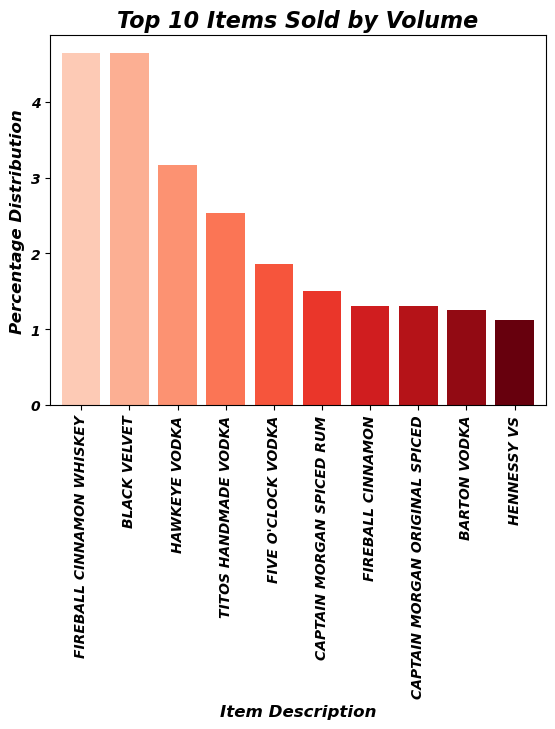

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# convert liquor_count to a pandas DataFrame
df = liquor_count.toPandas()

# define the color map
colors = plt.cm.Reds(np.linspace(0.2, 1, len(df)))

# create the vertical bar graph with colors
ax = df.plot(kind='bar', x='item_description', y='Percentage Distribution', legend=False, color=colors, width=0.8)

# set the title and axis labels
ax.set_title('Top 10 Items Sold by Volume', fontsize=16, fontweight='bold', fontstyle='italic')
ax.set_xlabel('Item Description', fontsize=12, fontweight='bold', fontstyle='italic')
ax.set_ylabel('Percentage Distribution', fontsize=12, fontweight='bold', fontstyle='italic')
plt.xticks(fontweight='bold', fontstyle='italic')
plt.yticks(fontweight='bold', fontstyle='italic')


# display the graph
plt.show()


These are the top 10 liquors that had the highest sale in Iowa and its percentage distribution is also given. ***FIREBALL CINNAMON WHISKEY*** had the highest sale in Iowa and it comprised of approx. *4.64%* of the total liquor bottles sold. 

#### [Question 2.2]: Which are the top liquors that have generated the highest profit?

In [30]:
from pyspark.sql.functions import sum

total_profit_df = iowa.withColumn("profit", (iowa["state_bottle_retail"] \
                                - iowa["state_bottle_cost"]) * iowa["bottles_sold"]) \
                                .groupBy("item_description").sum("profit").toPandas()

total_profit_df = total_profit_df.sort_values(by="sum(profit)", ascending=False).head(10)

total_profit_df



,item_description,sum(profit)
8456,BLACK VELVET,4.628493e+07
3963,TITOS HANDMADE VODKA,4.452849e+07
250,FIREBALL CINNAMON WHISKEY,2.833095e+07
463,CAPTAIN MORGAN SPICED RUM,2.448320e+07
21,CROWN ROYAL,2.384675e+07
1018,JACK DANIELS OLD #7 BLACK LBL,2.240712e+07
10165,HAWKEYE VODKA,1.984709e+07
4727,CAPTAIN MORGAN ORIGINAL SPICED,1.821210e+07
10471,CROWN ROYAL REGAL APPLE,1.806067e+07
6535,JAMESON,1.805798e+07


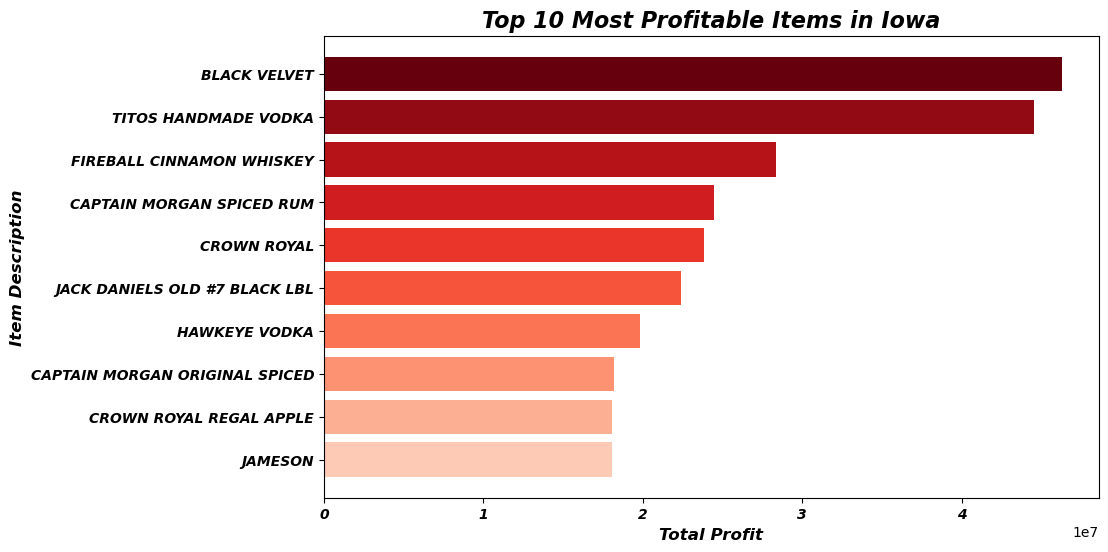

In [31]:
import matplotlib.pyplot as plt
import numpy as np

total_profit_df = iowa.withColumn("profit", (iowa["state_bottle_retail"] \
- iowa["state_bottle_cost"]) * iowa["bottles_sold"]) \
.groupBy("item_description").sum("profit").toPandas()

total_profit_df = total_profit_df.sort_values(by="sum(profit)", ascending=True).tail(10)

colors = plt.cm.Reds(np.linspace(0.2, 1, len(total_profit_df)))

plt.figure(figsize=(10, 6))
plt.barh(total_profit_df["item_description"], total_profit_df["sum(profit)"], color=colors)
plt.title("Top 10 Most Profitable Items in Iowa", fontsize=16, fontweight='bold', fontstyle='italic')
plt.xlabel("Total Profit", fontsize=12, fontweight='bold', fontstyle='italic')
plt.ylabel("Item Description", fontsize=12, fontweight='bold', fontstyle='italic')
plt.xticks(fontweight='bold', fontstyle='italic')
plt.yticks(fontweight='bold', fontstyle='italic')
plt.show()





The liquors that have generated the highest profit in Iowa from 2012 to current are ***BLACK VELVET***, followed by ***TITOS HANDMADE VODKA*** and ***FIREBALL CINNAMON WHISKEY***. These 3 liquors combine to a total of ****10%* approx. total profit*** from liquor sale in Iowa. 

#### [Question 2.3]: Top 5 Liquors that have the highest Profit Margin

In [32]:
from pyspark.sql.functions import avg, round, sum

# calculate the total profit margin across all item_description
total_profit_margin = iowa.agg(sum(iowa["state_bottle_retail"] - iowa["state_bottle_cost"])).collect()[0][0]

# calculate the top 5 items with highest average profit margin
profit = iowa.withColumn("profit_margin", (iowa["state_bottle_retail"] - iowa["state_bottle_cost"])) \
                .groupBy("item_description") \
                .agg(avg("profit_margin").alias("avg_profit_margin")) \
                .orderBy("avg_profit_margin", ascending=False) \
                .limit(5)

# add a new column with the percentage distribution of profit margin for each item_description
profit = profit.withColumn("Percentage Distribution", round(profit["avg_profit_margin"] / total_profit_margin * 100, 5))

# sort the DataFrame by avg_profit_margin column in descending order
profit = profit.sort("avg_profit_margin", ascending=False)

profit.show()


+--------------------+-----------------+-----------------------+
|    item_description|avg_profit_margin|Percentage Distribution|
+--------------------+-----------------+-----------------------+
|GLENGOYNE SINGLE ...|           9218.0|                0.00684|
|CEDAR RIDGE RESER...|           3840.0|                0.00285|
|CEDAR RIDGE MALTE...|           3050.0|                0.00226|
|CEDAR RIDGE PORT ...|           3000.0|                0.00223|
|CEDAR RIDGE PORT ...|           3000.0|                0.00223|
+--------------------+-----------------+-----------------------+



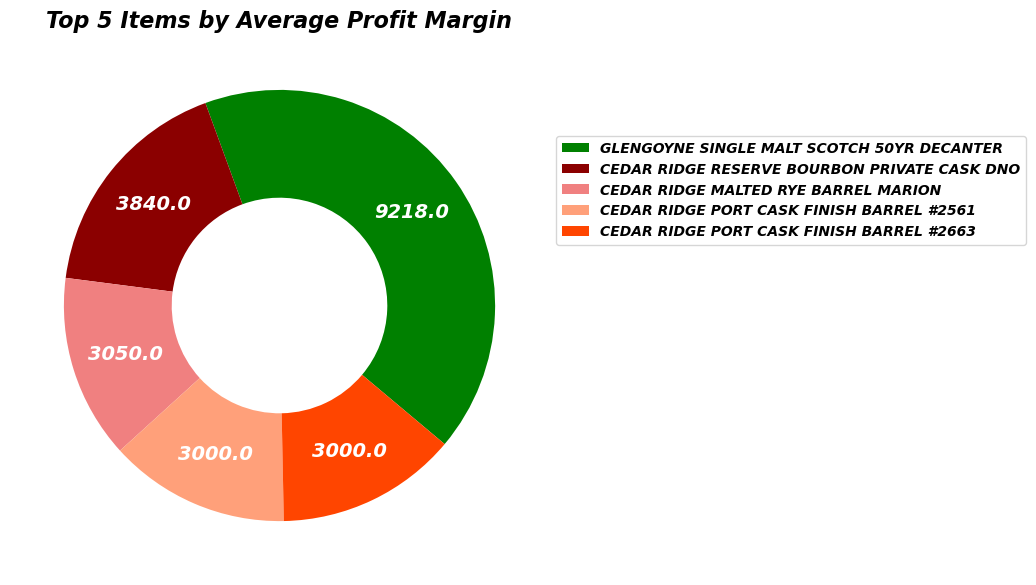

In [33]:
import matplotlib.pyplot as plt

# Define the coral color palette
coral_colors = ['green', 'darkred', 'lightcoral' , 'lightsalmon', '#FF4500']

profit_df = iowa.withColumn("profit_margin", (iowa["state_bottle_retail"] - iowa["state_bottle_cost"])) \
                .groupBy("item_description") \
                .agg({"profit_margin": "avg"}) \
                .orderBy("avg(profit_margin)", ascending=False) \
                .limit(5) \
                .toPandas()

data_dict = dict(zip(profit_df.item_description, profit_df['avg(profit_margin)']))

fig, ax = plt.subplots(figsize=(7, 7))
wedges, _, autotexts = ax.pie(data_dict.values(), wedgeprops=dict(width=0.5), startangle=-40,
                              autopct="", pctdistance=0.75, textprops=dict(color="w", fontsize=14, fontstyle="italic", weight="bold"),
                              colors=coral_colors)

# Modify the autotexts to display the average profit margin values
for i, autotext in enumerate(autotexts):
    autotext.set_text(f"{list(data_dict.values())[i]}")

# Add legend box in the right corner
ax.legend(wedges, data_dict.keys(), loc='lower left', bbox_to_anchor=(1.0, 0.6), prop={"style": "italic", "weight": "bold"})

# Add title and axis labels
ax.set_title("Top 5 Items by Average Profit Margin", fontsize=16, fontstyle="italic", weight="bold")

plt.show()


***GLENGOYNE SINGLE MALT SCOTCH 50YR DECANTER*** has the highest average profit margin, which is more than double that of the second item (CEDAR RIDGE RESERVE BOURBON PRIVATE CASK DNO). 

#### [Question 2.4]: What are the top-selling liquor brands in Iowa on the basis of Volume sold (in Liters) to Consumers?

In [34]:
from pyspark.sql.functions import desc

liquor_volume = iowa.groupBy("category_name") \
                      .sum("volume_sold_liters") \
                      .withColumnRenamed("sum(volume_sold_liters)", "Total Volume Sold (in Liters) to Consumers")
top_liquors = liquor_volume.sort(desc("Total Volume Sold (in Liters) to Consumers"))
top_liquor_volume = top_liquors.limit(7).toPandas()
top_liquor_volume

,category_name,Total Volume Sold (in Liters) to Consumers
0,AMERICAN VODKAS,3.434164e+07
1,CANADIAN WHISKIES,3.081371e+07
2,VODKA 80 PROOF,1.779740e+07
3,SPICED RUM,1.586548e+07
4,STRAIGHT BOURBON WHISKIES,1.114497e+07
5,WHISKEY LIQUEUR,1.010013e+07
6,BLENDED WHISKIES,9.267264e+06


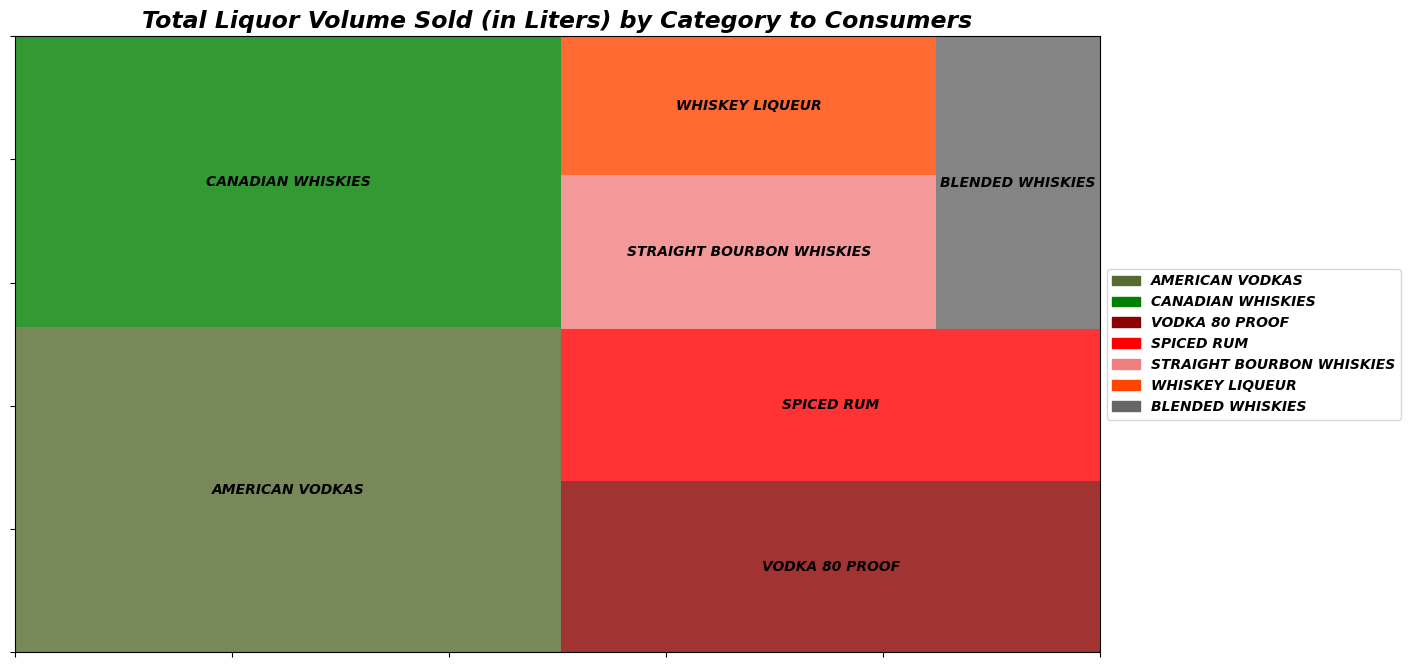

In [35]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import squarify

# Define colors for treemap
color_list = ['darkolivegreen', 'green', 'darkred', 'red' , 'lightcoral', '#FF4500', '#666666']

# Create a treemap
fig, ax = plt.subplots(figsize=(14, 8))
squarify.plot(sizes=top_liquor_volume['Total Volume Sold (in Liters) to Consumers'], label=top_liquor_volume['category_name'], alpha=0.8,
              color=color_list, ax=ax)
plt.tick_params(labelbottom=False, labelleft=False)

# Add legend box
legend_patches = [mpatches.Patch(color=color_list[i], label=top_liquor_volume['category_name'][i]) for i in range(len(top_liquor_volume))]
ax.legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1, 0.5))

# Bold and italicize the text on the treemap and in the legend
for text in ax.texts:
    text.set_fontweight('bold')
    text.set_fontstyle('italic')
for text in ax.legend_.get_texts():
    text.set_fontweight('bold')
    text.set_fontstyle('italic')

plt.title("Total Liquor Volume Sold (in Liters) by Category to Consumers", fontweight='bold', fontstyle='italic', fontsize=17)
plt.show()


The table and graph above showcase that ***Canadian Whiskies*** and ***American Vodkas*** are the two categories that have had the highest volume sold (in Liters) to consumers.  

#### [Question 2.5]: Which liquors have had the highest jump in sales from last year? 

In [36]:
# Create a new column for the year
from pyspark.sql.functions import year, sum

iowa_with_year = iowa.withColumn("year", year(iowa["date"]))

# Get sales by liquor type and year
sales_by_type_and_year = iowa_with_year.groupBy("item_description", "year") \
                                       .agg(sum("bottles_sold").alias("total_sales"))

# Pivot the data to get sales by liquor type for each year
sales_by_type_pivot = sales_by_type_and_year.groupBy("item_description") \
                                            .pivot("year") \
                                            .sum("total_sales") \
                                            .fillna(0)

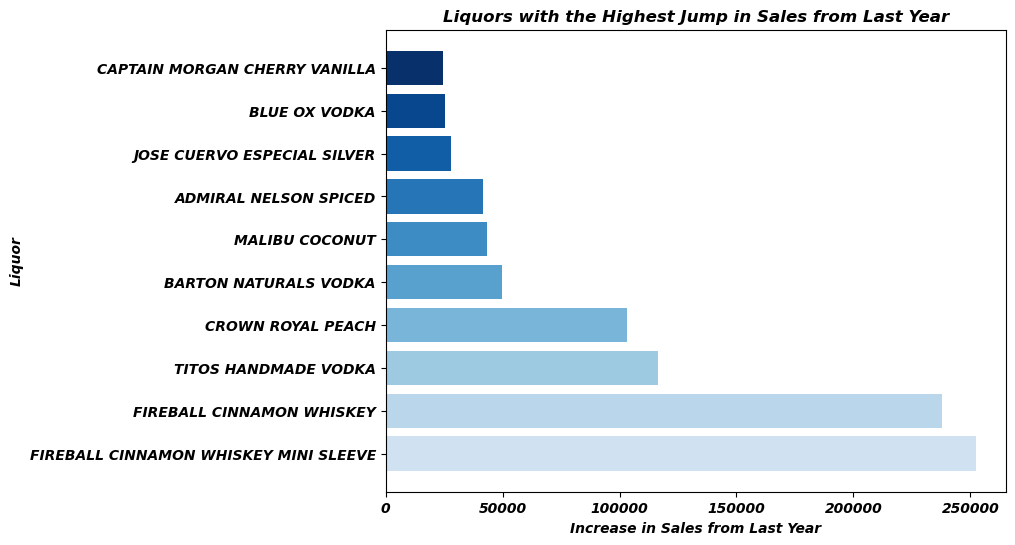

In [37]:
# Calculate the difference in sales between the two years
sales_diff = sales_by_type_pivot.withColumn("sales_diff", sales_by_type_pivot["2022"] - sales_by_type_pivot["2021"]) \
                                .sort(desc("sales_diff"))

# Get the top 10 liquors with the highest jump in sales
top_sales_diff = sales_diff.limit(10).toPandas()

import matplotlib.pyplot as plt

colors = plt.cm.Blues(np.linspace(0.2, 1, len(top_sales_diff)))

plt.figure(figsize=(8, 6))
plt.barh(y=top_sales_diff["item_description"], width=top_sales_diff["sales_diff"], color=colors)

# Set font properties for the plot elements
plt.xlabel("Increase in Sales from Last Year", fontweight='bold', fontstyle='italic')
plt.ylabel("Liquor", fontweight='bold', fontstyle='italic')
plt.title("Liquors with the Highest Jump in Sales from Last Year", fontweight='bold', fontstyle='italic')

# Set font properties for the tick labels
plt.xticks(fontweight='bold', fontstyle='italic')
plt.yticks(fontweight='bold', fontstyle='italic')

plt.show()


### **Topic 3: Forecasting Demand of Liqour Based on Historic Data**

#### [Question 3.1]: Predict the demand of the liquor and the volume sold (in liter) in 2023 months that has had the highest grossing profit (2012-2022)?

From Question 2.1, we know that **BLACK VELVET** has generated the highest profit in Iowa (2012-2022). Let's predict the demand of this liquor in terms of count and volume sold (in liter) on the basis of historical data analysis. 

In [39]:
iowa_filtered = iowa.filter(iowa.item_description == "BLACK VELVET")

# calculate the total sales volume (in liters) and number of bottles sold for BLACK VELVET for each month
total_df = iowa_filtered.groupBy("month").sum("volume_sold_liters", "bottles_sold").orderBy("month").toPandas()
total_df = total_df.sort_values(by="sum(bottles_sold)", ascending=False)

# calculate the total sales volume (in liters) and number of bottles sold for BLACK VELVET across all months
total_volume_sold = total_df["sum(volume_sold_liters)"].sum()
total_bottles_sold = total_df["sum(bottles_sold)"].sum()

# add percentage columns to the dataframe
total_df["percentage_volume_sold"] = round(total_df["sum(volume_sold_liters)"] / total_volume_sold * 100, 2)
total_df["percentage_bottles_sold"] = round(total_df["sum(bottles_sold)"] / total_bottles_sold * 100, 2)

total_df = total_df.sort_values(by="sum(bottles_sold)", ascending=False)
total_df


,month,sum(volume_sold_liters),sum(bottles_sold),percentage_volume_sold,percentage_bottles_sold
9,10,1862991.54,1460636,12.65,11.35
4,5,1884633.92,1448339,12.80,11.25
1,2,1899011.20,1443760,12.89,11.22
11,12,1478666.82,1256109,10.04,9.76
6,7,1294243.09,1095624,8.79,8.51
8,9,1284971.52,1073658,8.72,8.34
7,8,878696.64,874122,5.97,6.79
3,4,873902.85,872740,5.93,6.78
0,1,851283.91,867139,5.78,6.74
5,6,853502.87,860241,5.80,6.68


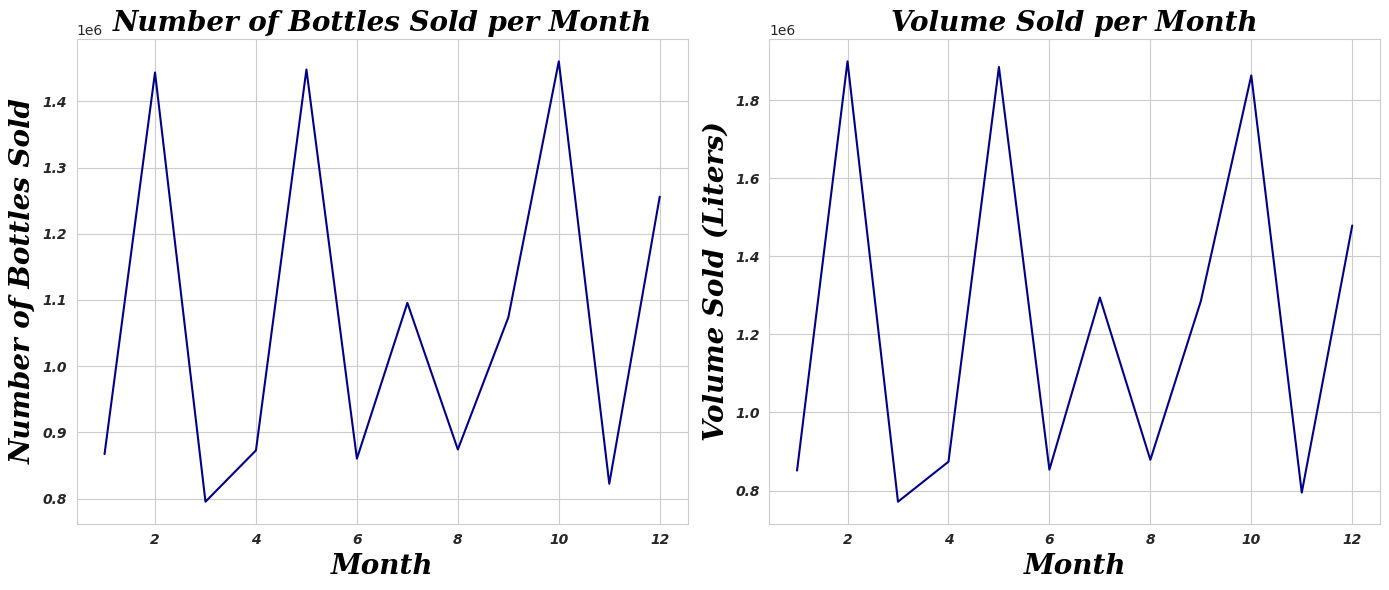

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# filter the data to only include BLACK VELVET sales
iowa_filtered = iowa.filter(iowa.item_description == "BLACK VELVET")

# group by month and sum the sales volume and number of bottles sold
total_df = iowa_filtered.groupBy("month").sum("volume_sold_liters", "bottles_sold").orderBy("month").toPandas()

# set the figure size and style
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# set the font properties for the title and axis labels
font = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 20, 'style': 'italic'}

# create the first subplot for bottles sold
plt.subplot(1, 2, 1)
sns.lineplot(x="month", y="sum(bottles_sold)", data=total_df, color="darkblue")
plt.title("Number of Bottles Sold per Month", fontdict=font)
plt.xlabel("Month", fontdict=font)
plt.ylabel("Number of Bottles Sold", fontdict=font)
plt.xticks(fontweight='bold', fontstyle='italic')
plt.yticks(fontweight='bold', fontstyle='italic')


# create the second subplot for volume sold
plt.subplot(1, 2, 2)
sns.lineplot(x="month", y="sum(volume_sold_liters)", data=total_df, color="darkblue")
plt.title("Volume Sold per Month", fontdict=font)
plt.xlabel("Month", fontdict=font)
plt.ylabel("Volume Sold (Liters)", fontdict=font)
plt.xticks(fontweight='bold', fontstyle='italic')
plt.yticks(fontweight='bold', fontstyle='italic')

# adjust the layout and show the plot
plt.tight_layout()
plt.show()


The highest bottles sold of Black Velvet based on actual historic data is during the months of ***October, May and February***. When analyzing the volume sold (in liters) we can see that the volume sold (in liters) is highest in ***February***, followed by ***May and October***. 

As such, through the two insights generated we can see that for Black Velvet, the volume sold is highest in the months in the sequence (higest to lowest) - ***February, May and October***, and for bottles sold the sequence (highest to lowest) - ***October, May and February***.

As such, when stocking up Black Velvet or any other alcohol, the actual historical data (similar to this procedure) can help to predict future demand and ensure there's no stockout.  

### **Topic 4: Understanding the Vendor and Retail Stores' Data**



#### [Question 4.1]: Which store has generated the highest revenue from liquor sales?

In [43]:
top_store = iowa.groupBy("store_name") \
               .sum("Revenue") \
               .withColumnRenamed("sum(Revenue)", "total_revenue") \
               .sort(desc("total_revenue")) \
               .first()["store_name"]

top_store

'HY-VEE #3 / BDI / DES MOINES'

The store that has generated the highest revenue in Iowa is: ***HY-VEE #3 / BDI / DES MOINES***


#### [Question 4.2]: Calculate the Highest Profit generated in Iowa across each Store and Category?


In [44]:
from pyspark.sql.functions import col, sum, round

# Calculate profit and group by store name and category name
profit_by_store_and_category = iowa.withColumn("profit", col("state_bottle_retail") - col("state_bottle_cost")) \
    .groupBy("store_name", "category_name") \
    .agg(sum("profit").alias("total_profit")) \
    .orderBy(col("total_profit").desc())

profit_by_store_and_category = profit_by_store_and_category.withColumn("total_profit", round("total_profit", 2))

# Show top 10 stores and categories by total profit generated
profit_by_store_and_category.limit(10).show(truncate=False)


+------------------------------------+-------------------------+------------+
|store_name                          |category_name            |total_profit|
+------------------------------------+-------------------------+------------+
|HY-VEE #3 / BDI / DES MOINES        |STRAIGHT BOURBON WHISKIES|103978.01   |
|HY-VEE #3 / BDI / DES MOINES        |100% AGAVE TEQUILA       |100728.5    |
|CENTRAL CITY LIQUOR, INC.           |SINGLE MALT SCOTCH       |95443.43    |
|CENTRAL CITY 2                      |100% AGAVE TEQUILA       |94980.07    |
|CENTRAL CITY 2                      |STRAIGHT BOURBON WHISKIES|84184.08    |
|CENTRAL CITY LIQUOR, INC.           |STRAIGHT BOURBON WHISKIES|83065.77    |
|CENTRAL CITY LIQUOR, INC.           |100% AGAVE TEQUILA       |77634.43    |
|CYCLONE LIQUORS                     |STRAIGHT BOURBON WHISKIES|75847.21    |
|CENTRAL CITY LIQUOR, INC.           |SCOTCH WHISKIES          |72951.85    |
|HY-VEE WINE AND SPIRITS / BETTENDORF|STRAIGHT BOURBON WHISKIES|

As you can see from the list, ***HY-VEEh and Central City*** are the two stores with ***the highest total profit***. Then, further analyzing by category, we can see that the highest profit alcohol categories are ***whiskey and Tequila*** respectively.

#### [Question 4.3]: Analyzing the Top Vendors that Supply the Most Liquor bottles to Retail Stores

In [45]:
from pyspark.sql.functions import desc, rank, sum
from pyspark.sql.window import Window

vendor_item_counts = iowa.groupBy("vendor_name", "item_description").agg(sum("bottles_sold").alias("item_count"))

# Show the top 5 vendors who supply the most
vendor_item_counts.orderBy(desc("item_count")).show(5)

+--------------------+--------------------+----------+
|         vendor_name|    item_description|item_count|
+--------------------+--------------------+----------+
|SAZERAC COMPANY  INC|FIREBALL CINNAMON...|  11172715|
|FIFTH GENERATION INC|TITOS HANDMADE VODKA|   6666646|
|           LUXCO INC|       HAWKEYE VODKA|   5030366|
|CONSTELLATION WIN...|        BLACK VELVET|   5011727|
|     DIAGEO AMERICAS|CAPTAIN MORGAN SP...|   4172335|
+--------------------+--------------------+----------+
only showing top 5 rows



The table showcases the ***Top 5 vendors*** that have sold the highest number of liquor bottles to retail stores. 


#### [Question 4.4]: Which Vendors qualify as the Top Vendors by Liquor Volume sold (in Liters) to Retail Stores?

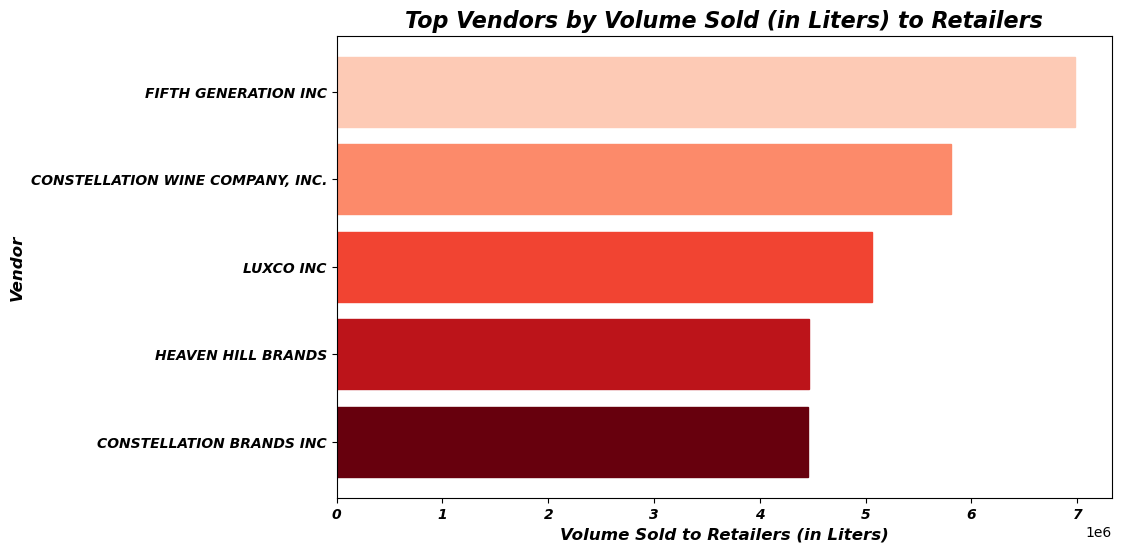

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql.functions import desc, rank, sum
from pyspark.sql.window import Window

vendor_item_counts = iowa.groupBy("vendor_name", "item_description").agg(sum("volume_sold_liters").alias("item_count"))
vendor_ranks = Window.partitionBy("vendor_name").orderBy(desc("item_count"))
vendor_item_counts_ranked = vendor_item_counts.withColumn("vendor_rank", rank().over(vendor_ranks))

top_vendors = vendor_item_counts_ranked.filter("vendor_rank = 1").orderBy(desc("item_count")).limit(5)
top_vendors.toPandas().to_csv('top_vendors.csv', index=False)
df = pd.read_csv('top_vendors.csv')

# Set the colors for the bars
colors = plt.cm.Reds(np.linspace(0.2, 1, 5))

# Create a horizontal bar chart of the top vendors
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(df['vendor_name'], df['item_count'], color=colors)
ax.set_title('Top Vendors by Volume Sold (in Liters) to Retailers', fontsize=16, fontweight='bold', fontstyle='italic')
ax.set_xlabel('Volume Sold to Retailers (in Liters)', fontsize=12, fontweight='bold', fontstyle='italic')
ax.set_ylabel('Vendor', fontsize=12, fontweight='bold', fontstyle='italic')

# Assign different colors to the top 5 bars
for i in range(5):
    ax.get_children()[i].set_color(colors[i])

# Invert the y-axis to show the top vendors at the top
ax.invert_yaxis()

# Set font properties for the tick labels
plt.xticks(fontweight='bold', fontstyle='italic')
plt.yticks(fontweight='bold', fontstyle='italic')

plt.show()


The above graph showcases the ***top 5 vendors*** that have sold the highest liquor volume (in liters) to retail stores in Iowa from 2012 to current. 

#### [Question 4.5]: How does the sales volume of liquor (by litres) vary across different counties in Iowa? Analyze the top 10 counties by volume of liquor (in liters)?

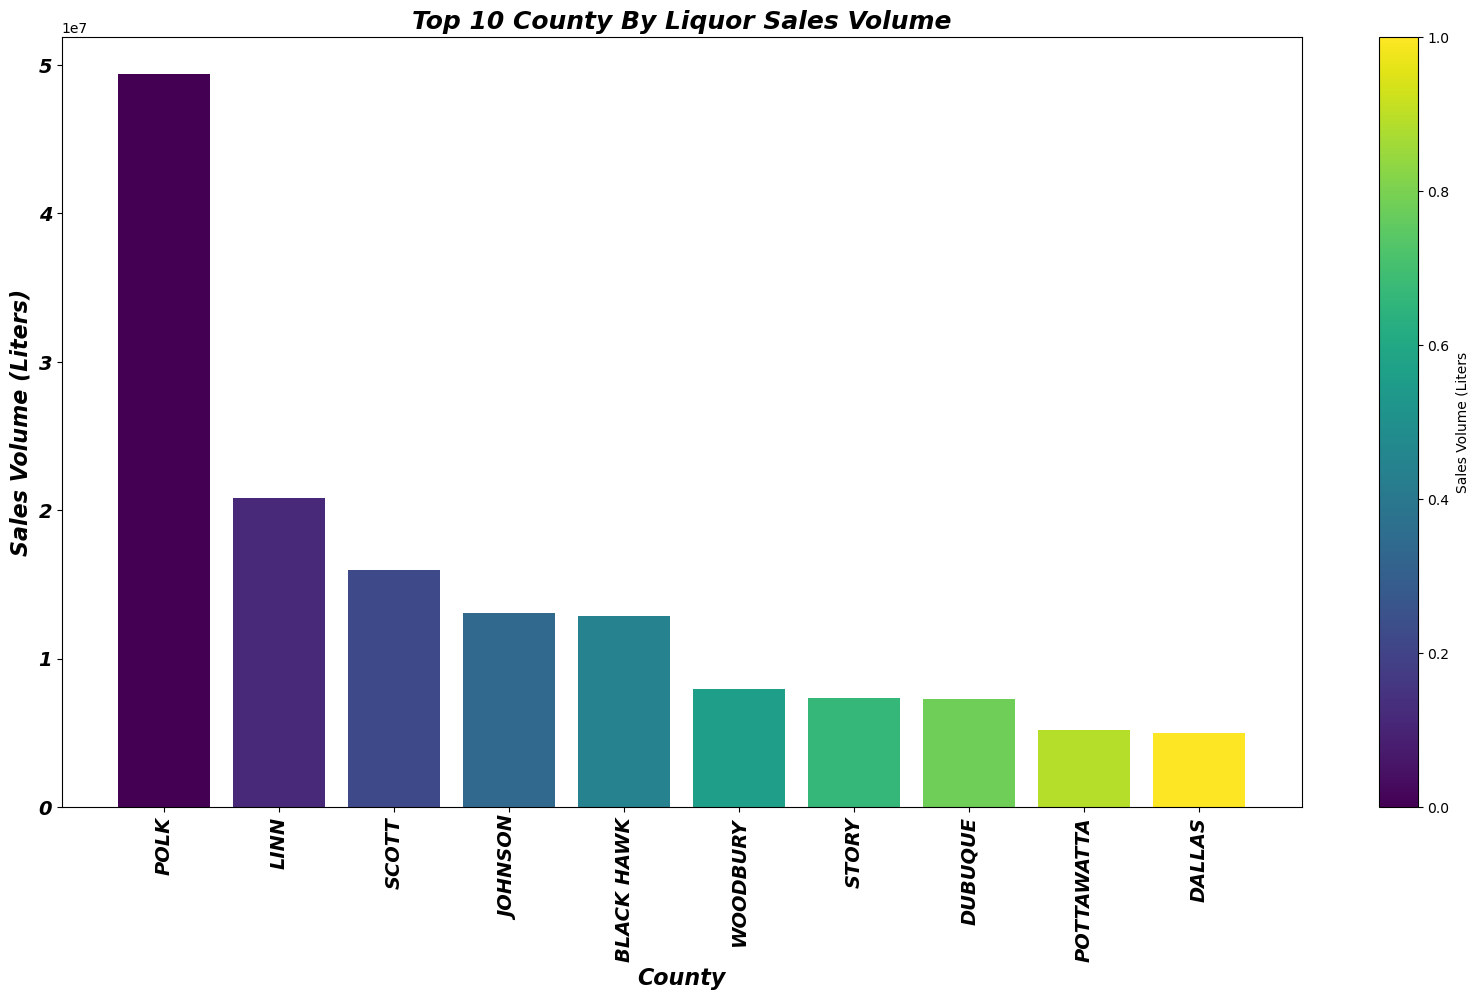

In [25]:
from matplotlib import pyplot as plt
import numpy as np

# Filter out rows with missing county values
iowa_df_filtered = iowa.filter(iowa.county.isNotNull())

# Convert volume_sold_liters to numeric type
iowa_df_filtered = iowa_df_filtered.withColumn("volume_sold_liters", iowa_df_filtered["volume_sold_liters"].cast("double"))

# Calculate the sum of sales_volume for each county
county_sales = iowa_df_filtered.groupBy("county").agg(sum("volume_sold_liters").alias("sales_volume")).orderBy("sales_volume", ascending=False).toPandas()

# Get the top 10 counties by sales volume
top_counties = county_sales.head(10)

# Plot a bar chart of the top 10 counties
fig, ax = plt.subplots(figsize=(20, 10))
bars = ax.bar(top_counties['county'], top_counties['sales_volume'], color=plt.cm.viridis(np.linspace(0, 1, len(top_counties))))
plt.xticks(rotation=90, fontsize=14, fontweight='bold', fontstyle='italic')
plt.yticks(fontsize=14, fontweight='bold', fontstyle='italic')
plt.xlabel('County', fontsize=16, fontweight='bold', fontstyle='italic')
plt.ylabel('Sales Volume (Liters)', fontsize=16, fontweight='bold', fontstyle='italic')
plt.title('Top 10 County By Liquor Sales Volume', fontsize=18, fontweight='bold', fontstyle='italic')
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), ax=ax, orientation='vertical', label='Sales Volume (Liters')
plt.show()


The bar chart displays liquor sales volume by county in Iowa, with Polk, Linn, Scott, Johnson, and Black Hawk as the top five counties. ***Polk County has the highest sales volume and almost more than double in comparison to other counties***. 

The graph reveals significant disparities in sales volumes across Iowa, suggesting that the liquor market is concentrated in these urbanized areas. This information can help retailers make informed decisions and develop targeted strategies for expansion or regulation.

#### [Question 4.6]: Which Vendors qualify as the Top Vendors by Liquor Volume sold (in Liters) to Retail Stores?

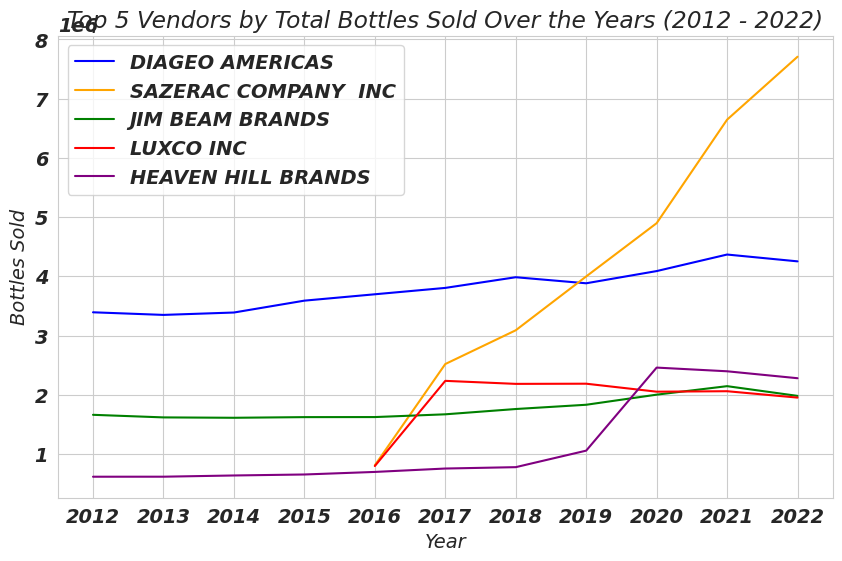

In [86]:
from pyspark.sql.functions import sum

iowa_filtered = iowa.filter((iowa.year >= 2012) & (iowa.year <= 2022))

# group by vendor and year to calculate the annual sales
annual_sales_by_vendor = iowa_filtered.groupBy("vendor_name", "year") \
    .agg(sum("bottles_sold").alias("annual_sales")) \
    .orderBy(["vendor_name", "year"])

# get the top 5 vendors by annual sales
top_5_vendors = annual_sales_by_vendor.groupBy("vendor_name") \
    .agg(sum("annual_sales").alias("total_sales")) \
    .orderBy(sum("annual_sales").desc()) \
    .limit(5).select("vendor_name").rdd.flatMap(lambda x: x).collect()

# filter the annual_sales_by_vendor dataframe to keep only the top 5 vendors
annual_sales_by_vendor_top_5 = annual_sales_by_vendor.filter(annual_sales_by_vendor.vendor_name.isin(top_5_vendors))

# pivot the data to have one column per vendor and one row per year
annual_sales_by_vendor_pivot = annual_sales_by_vendor_top_5.groupBy("year") \
    .pivot("vendor_name") \
    .agg(sum("annual_sales").alias("annual_sales")) \
    .orderBy("year")

# create a line chart with different colors for each vendor
plt.figure(figsize=(10, 6))
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.style'] = 'italic'
colors = ["blue", "orange", "green", "red", "purple"]
for i, vendor in enumerate(top_5_vendors):
    plt.plot(annual_sales_by_vendor_pivot.select(vendor).collect(), color=colors[i], label=vendor)
    
# set x and y axis labels and ticks
plt.xticks(range(len(annual_sales_by_vendor_pivot.select("year").collect())), annual_sales_by_vendor_pivot.select("year").rdd.flatMap(lambda x: x).collect())
#plt.yticks([1000000, 3000000, 5000000, 70000000, 90000000], ['1M', '3M', '5M', '7M', '9M'])
plt.xlabel("Year")
plt.ylabel("Bottles Sold")
plt.title("Top 5 Vendors by Total Bottles Sold Over the Years (2012 - 2022)")
plt.legend(loc="upper left")

# show the chart
plt.show()


The line chart above shows the total number of bottles sold by the ***top 5 vendors in Iowa between 2012 and 2022***. 
From the chart, we can see that all the top 5 vendors experienced a ***significant increase in the number of bottles sold from 2016 to 2022***. ***Sazerac*** and ***Luxco*** saw a steep increase in the number of bottles sold after 2016. Similar trend was seen with Heaven Hill Brands after 2019. Diageo Americas has seen a stable increase in sales over the years, without any significant decline in the bottles sold.

One interesting observation is that the sales of the top 5 vendors seem to be correlated with each other, with their sales trends following a similar pattern over the years. This could be due to factors such as changes in consumer preferences, economic conditions, or regulations affecting the entire industry.

## 6. Machine Learning 

Through prediction analysis, we want to predict the ***volume sold (liters)*** (dependent variable) on the basis of the historical data (2012 - 2022). As such, when ***demographic, store, liquor and location information*** will be fed into the model, the retailers will get a fair idea on how much volume of liquor sold to "expect" for each month in the upcoming years.

For instance, a retailer wants to understand the expected volume sold of *Black Velvet* in a particular store of a particular location and in a particular month; we will be able to achieve this through our prediction modelling. 

In [67]:
iowa_ml = iowa.sample(fraction=0.05, seed=42)
iowa_ml.cache()

23/05/01 18:11:30 WARN SQLConf: The SQL config 'spark.sql.execution.arrow.enabled' has been deprecated in Spark v3.0 and may be removed in the future. Use 'spark.sql.execution.arrow.pyspark.enabled' instead of it.


DataFrame[invoice_and_item_number: string, date: date, store_number: string, store_name: string, address: string, city: string, zip_code: string, store_location: string, county_number: string, county: string, category: string, category_name: string, vendor_number: string, vendor_name: string, item_number: string, item_description: string, pack: bigint, bottle_volume_ml: bigint, state_bottle_cost: double, state_bottle_retail: double, bottles_sold: bigint, sale_dollars: double, volume_sold_liters: double, volume_sold_gallons: double, year: bigint, month: bigint]

### 6.1 Data Cleaning for Machine Learning

***Dropping certain columns that are  irrelevant for predictive analysis to obtain accurate model results***

In [68]:
iowa_ml = iowa_ml.drop('bottles_sold','volume_sold_gallons','store_location','invoice_and_item_number','date', 'store_name', 'address','county', 'store_location','category_name','vendor_name','item_description','year')

***Dropping Null Values***

In [69]:
iowa_ml = iowa_ml.na.drop(how="any")

# Here we check again if all the nulls have been dropped 
from pyspark.sql.functions import col

for col_name in iowa_ml.columns:
    print(f"Number of null values in {col_name}: {iowa_ml.filter(col(col_name).isNull()).count()}")

Number of null values in store_number: 0


Number of null values in city: 0


Number of null values in zip_code: 0


Number of null values in county_number: 0


Number of null values in category: 0
Number of null values in vendor_number: 0
Number of null values in item_number: 0
Number of null values in pack: 0
Number of null values in bottle_volume_ml: 0
Number of null values in state_bottle_cost: 0
Number of null values in state_bottle_retail: 0
Number of null values in sale_dollars: 0
Number of null values in volume_sold_liters: 0
Number of null values in month: 0


***Repeating the column manipulations as done for EDA***

In [70]:
from pyspark.sql.functions import col

iowa_ml = iowa_ml.withColumn("bottle_volume_liters", col("bottle_volume_ml") / 1000)
iowa_ml = iowa_ml.drop('bottle_volume_ml')

iowa_ml = iowa_ml.withColumnRenamed("sale_dollars", "Revenue")

### 6.2 Modelling

The formula is set to "volume_sold_liters ~ .", which means that volume_sold_liters is the target or dependent variable, and all other columns in the dataframe will be used as features or independent variables in a regression-based supervised machine learning model.

In [71]:
from pyspark.ml.feature import RFormula

supervised = RFormula(formula="volume_sold_liters ~ .")
fittedRF = supervised.fit(iowa_ml)

By calling the fit() function on supervised with iowa_ml as its argument, the formula is applied to the dataframe to transform the features and create a new column features containing the transformed features. Additionally, a column named label is created, which contains the target variable specified in the formula.

In [76]:
preparedDF = fittedRF.transform(iowa_ml)

By calling the transform() function on fittedRF with iowa_ml as its argument, the formula is applied to the dataframe to transform the features and create a new column features containing the transformed features. Additionally, a column named label is created, which contains the target variable specified in the formula.

In [77]:
preparedDF.select('features','label').show(2, truncate=False)

+------------------------------------------------------------------------------------------------------------------------------------------+-----+
|features                                                                                                                                  |label|
+------------------------------------------------------------------------------------------------------------------------------------------+-----+
|(12303,[77,2770,3287,4213,4303,4415,5825,12297,12298,12299,12300,12301,12302],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,48.0,1.31,1.97,94.56,9.0,0.2]) |9.6  |
|(12303,[189,2747,3210,4205,4300,4410,5055,12297,12298,12299,12300,12301,12302],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,3.97,5.95,785.4,9.0,1.0])|132.0|
+------------------------------------------------------------------------------------------------------------------------------------------+-----+
only showing top 2 rows



In [78]:
iowa_ml = iowa_ml.withColumn("month", iowa_ml["month"].cast("string"))

Converting the "Month" column to string for data modeling. By converting the "month" column to a string data type, it will be easier to handle and manipulate the column in data modeling tasks that require string inputs, such as certain types of feature engineering or model training.

In [79]:
train, test = preparedDF.randomSplit([0.7, 0.3], seed = 83)

The split weights are kept as [0.7, 0.3], which means that 70% of the rows will be allocated to the train subset and 30% will be allocated to the test subset.

The resulting train and test dataframes can be used for model training and model evaluation, respectively. The train subset will be used to fit the model, and the test subset will be used to evaluate the model's performance on new, unseen data.

### ***Linear Regression***

In the line lrModel = lr.fit(train), we are fitting the linear regression model using the training data. 

In [80]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(maxIter=100, regParam=0.3, elasticNetParam=0.8)
print(lr.explainParams())
lrModel = lr.fit(train)
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))

aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0, current: 0.8)
epsilon: The shape parameter to control the amount of robustness. Must be > 1.0. Only valid when loss is huber (default: 1.35)
featuresCol: features column name. (default: features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label)
loss: The loss function to be optimized. Supported options: squaredError, huber. (default: squaredError)
maxBlockSizeInMB: maximum memory in MB for stacking input data into blocks. Data is stacked within partitions. If more than remaining data size in a partition then it is adjusted to the data size. Default 0.0 represents choosing optimal value, depends on specific algorithm. Must be >= 0. (default: 0.0)
maxIter: max number of iterations (>= 0). (defaul

23/05/01 18:24:38 WARN DAGScheduler: Broadcasting large task binary with size 2.1 MiB
23/05/01 18:25:01 WARN DAGScheduler: Broadcasting large task binary with size 2.1 MiB
23/05/01 18:25:03 WARN DAGScheduler: Broadcasting large task binary with size 2.1 MiB
23/05/01 18:25:21 WARN DAGScheduler: Broadcasting large task binary with size 2.1 MiB
23/05/01 18:25:22 WARN DAGScheduler: Broadcasting large task binary with size 2.1 MiB
23/05/01 18:25:26 WARN DAGScheduler: Broadcasting large task binary with size 2.1 MiB
23/05/01 18:25:26 WARN DAGScheduler: Broadcasting large task binary with size 2.1 MiB
23/05/01 18:25:31 WARN DAGScheduler: Broadcasting large task binary with size 2.1 MiB
23/05/01 18:25:31 WARN DAGScheduler: Broadcasting large task binary with size 2.1 MiB
23/05/01 18:25:35 WARN DAGScheduler: Broadcasting large task binary with size 2.1 MiB
23/05/01 18:25:36 WARN DAGScheduler: Broadcasting large task binary with size 2.1 MiB
23/05/01 18:25:40 WARN DAGScheduler: Broadcasting larg

Coefficients: (12303,[151,410,703,709,1406,1461,1583,2586,2734,4298,4299,4300,4303,4306,4316,4319,4323,4331,4345,4355,4391,4401,4403,4405,4406,4408,4410,4411,4413,4416,4418,4423,4425,4426,4440,4464,4591,4655,4881,4891,4915,4916,4920,4929,4930,4946,4950,4955,4962,4963,4965,4966,4968,4982,4985,4991,5001,5004,5006,5011,5038,5055,5067,5086,5137,5144,5147,5154,5156,5164,5174,5184,5240,5422,5439,5530,5619,5642,5655,5779,5974,6200,6221,6588,7371,7417,7616,8192,8424,8653,8755,8759,8794,8796,8920,8922,9148,9405,9439,9745,9779,9875,10207,10251,10379,10497,10803,10820,10828,10916,11115,11757,11816,11820,11832,11846,11852,11859,11874,11911,12021,12051,12298,12299,12300,12302],[1.5188119169246614,-8.946403498931396,-8.35258054905929,2.6236455328469015,-11.647942006865872,-8.963247971357482,-8.294166312157188,-76.55000403301453,-241.29587914171535,1.8882895659982393,-0.4992827092375825,2.343125966507245,0.06733335851245396,0.32544507189769245,-0.3308153312304543,-0.56734665213856,-3.6163749307827113

The coefficients represent the slope of the linear regression line for each feature, and the intercept represents the point at which the line intercepts the y-axis. Together, these values define the linear regression equation that can be used to make predictions on new data.

The output shows the evaluation metrics of the trained linear regression model. The root mean squared error (RMSE) is 16.92, indicating that the model's predictions are off by an average of 16.92 units from the actual values. The R-squared value of 0.78 indicates that the model explains 78% of the variability in the target variable. The objective history shows the convergence of the optimization algorithm over the 30 iterations.

In [81]:
trainingSummary = lrModel.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))

RMSE: 16.929288
r2: 0.785761
numIterations: 30
objectiveHistory: [0.4999994075253761, 0.41012106696285816, 0.1368907652756384, 0.12653880566056924, 0.12273183377954813, 0.12108705370068398, 0.12088041245634697, 0.12082373653904842, 0.12080170145506193, 0.12079428633347063, 0.12079264834028286, 0.12079242232508422, 0.12079227943589184, 0.12079223465507057, 0.12079219739440264, 0.12079219264739226, 0.12079219080585962, 0.12079218970813012, 0.1207921891242404, 0.12079218861534301, 0.12079218815465577, 0.12079218580588376, 0.12079216760987724, 0.12079210255195427, 0.12079210238019407, 0.12079210097664074, 0.1207921006176273, 0.1207920986689634, 0.12079209855803712, 0.12079209835726473, 0.12079209826736571]


Here we display the residuals from the linear regression model. Residuals are the differences between the actual target values and the predicted values by the model. The output will be a table showing the residuals for each row in the training dataset.

In [82]:
trainingSummary.residuals.show()

23/05/01 18:29:02 WARN DAGScheduler: Broadcasting large task binary with size 2.1 MiB


+--------------------+
|           residuals|
+--------------------+
| -1.4035993601596166|
|  -5.497024187756349|
|-0.10650763949550779|
|  15.979574647919158|
|  1.3035932309383593|
|  -7.692958363563591|
|  -8.149240182408818|
|  -8.149240182408818|
|  3.9228592822535937|
| 0.12725362821456088|
|  2.0568724789044985|
|   8.751194364093998|
| -23.377552380266735|
|  3.6745142442093712|
|   2.888088762965964|
| -1.6255083005586481|
|  0.5901791168591064|
|   2.752932489956449|
|   2.125845204748817|
|0.028241346818846935|
+--------------------+
only showing top 20 rows



 We calculate the root mean squared error (RMSE) on the test dataset using the evaluate() method of the trained linear regression model. The resulting RMSE value of 18.2065

In [83]:
test_result = lrModel.evaluate(test)
print("RMSE on test data = %f" % test_result.rootMeanSquaredError)

23/05/01 18:29:03 WARN DAGScheduler: Broadcasting large task binary with size 2.1 MiB
23/05/01 18:29:28 WARN DAGScheduler: Broadcasting large task binary with size 2.1 MiB


RMSE on test data = 18.206534


The RMSE for the train data is 16.92, while the ***RMSE value of 18.20 on the test data***, suggesting that the model ***generalizes*** well on unseen data.

As such, now the model is ready to be deployed on new data to predict the volume sold (in liters) when the ***demographic, store, liquor and location information*** is fed into the model!

## 7. Conclusion

Overall, the analysis of liquor sales in Iowa from 2012 to 2022 showed some patterns of consistency and the key insights are stated below: 

* Liqour sales ***increased exponentially from 2012 to 2021***, but sales dropped in 2022. One potential reason can be the effect of covid-19, where residents of Iowa purchased more alcohol during the work-home culture during the pandemic. 
* Through a month-to-month analysis, we saw that the liquor sale is highest in the month of December, followed by October, across all years (2012-2022). One potential reason can be that December is a holiday season, leading to an increased liquor sale.
* The top-selling liquor was ***Fireball Cinnamon Whiskey***, while the liquors that generated the highest profit were Black Velvet, Tito's Handmade Vodka, and Fireball Cinnamon Whiskey. 
* ***Canadian Whiskies and American Vodkas*** were the two categories with the highest volume sold to consumers. 
* ***Polk County*** had the highest liquor sales by volume, followed by Lynn and Scott counties. 
* The store with the highest revenue was `HY-VEE #3/BDI/Des Moines`. 

Through these insights and more explored within the notebook, we can conclude that retailers can use this information to make informed decisions about expansion and regulations, and stakeholders can consider the reasons for higher sales volumes in top counties to improve sales performance in other regions. Additionally, key warehouse and inventory decisions can be made keeping in mind the data and explorations undergone. Lastly, location of stores mapped with external factors such as key consumer demographics can be used in expansion decisions.


## 8. Future Scope


Through our premilinary analysis, we touched different aspects of the dataset. Now in the next phase of our analysis, we will drill-down on various trends and patterns seen in the analysis and will analyze the reasons behind them. For instance, we will decipher how demand has been changing on a granular level (city, county and district level). 
Through our analysis, we will then provide effective, data-driven and actionable recommendations to our key stakeholders and address the business KPIs and key pain points.

#### ***For Exploratory Phase***

* ***Merging Additional Data to Improve Exploratory Analysis:*** The data doesn't include a lot of vital factors required to extract the precise pictures of store profits. For instance, we require essential information such as supply-chain cost (inventory holdout cost, transportation cost etc) and labor cost (staffing, security personnel etc). Generally speaking, in the alcoholic beverage industry, it is very common for inventory costs to account for 20% to 30% of the product value. Within this, we can also explore key factors such as customer segmentation if we acquire the relevant data, allowing retailers to target different drinks to different consumer groups. 

* ***Tightening the Entire Liquor Business Chain in Iowa:*** Through this phase, we targeted retailers as our key stakeholder, in the next phase we will also target wholesalers and consumers* and perform analysis and data-driven recommendations to these stakeholders to ensure that the entire liquor business in Iowa is streamlined. For instance, through our analysis, we would be to able showcase the consumers for the same exact alcohol, which retail store is selling cheaper or an expensive rate to ensure informed decisions can be made. Through this, retailers will have to have competitive pricing and would be forced to optimize their supply-chain.

* ***Exploring Pricing Decisions:*** Retailers can use the information and details above to understand key characteristics about their competitors, such as different markups used in different regions by multiple retailers. Through understanding those numbers, they can create a range of where their different markups can lie and compete within the industry. 

#### ***For Predictive Modelling***

* ***Feature engineering that can help improve model performance:*** *Encoding categorical variables, scaling/normalization, interaction terms, and polynomial features* are useful techniques for feature engineering. These techniques can help improve model performance by refining existing features or selecting relevant ones. Feature engineering allows exploring data further and potentially finding new features for accurate predictions and gaining insights, informing us about the prediction of volume sold more accurately. Adding feature engineering to future scope can enhance model efficiency and performance.

* ***Hyperparameter tuning:*** This can also be an important step in machine learning model building that involves finding the best combination of hyperparameters for optimal model performance. Adding algorithms like grid search with k-fold cross-validation as a future scope can fine-tune the model, potentially leading to better business outcomes. It can improve the efficiency of the model-building process by prioritizing development efforts.